In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [39]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [40]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() #wine데이터에서 알코올과 당분과 ph 값을 data에 저장
target = wine['class'].to_numpy() #class 값을 예측 대상으로 target에 저장

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [41]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42) #랜덤 포레스트 분류기 생성
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) #교차 검증 수행


print(np.mean(scores['test_score'])) #테스트 세트의 정확도 출력

0.8905151032797809


In [42]:
rf.fit(train_input, train_target) #두개의 데이터를 사용하여 훈련
print(rf.feature_importances_) #모델 특성 중요도 출력

[0.23167441 0.50039841 0.26792718]


In [43]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42) #obb 샘플을 이용해 평가를 하라는 뜻, n_job=-1은 가능한 모든 CPU 코어를 사용해 병렬 처리하라는 의미

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [44]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=42) #Extra Trees 분류기 생성
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)#교차 검증 수행


print(np.mean(scores['test_score'])) #교차 검증을 통해 얻은 테스트 세트의 정확도 평균 출력


0.8887848893166506


In [45]:
et.fit(train_input, train_target)
print(et.feature_importances_) #훈련된 모델의 특성 중요도 출력

[0.20183568 0.52242907 0.27573525]


In [46]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42) #Gradient Boosting 분류기 생성
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1) #교차 검증

print(np.mean(scores['test_score']))

0.8780082549788999


In [47]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [48]:
hgb = HistGradientBoostingClassifier(random_state=42) #Histogram-based Gradient Boosting 분류기 생성
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8801241948619236


In [49]:
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [50]:
hgb.score(test_input, test_target)

0.8723076923076923

In [51]:
xgb = XGBClassifier(tree_method='hist', random_state=42) #XGBoost 분류기 생성
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8782000074035686


In [52]:
lgb = LGBMClassifier(random_state=42) #LightGBM 분류기 생성
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


In [53]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy # 과일 데이터 다운

--2023-12-19 13:01:18--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-12-19 13:01:18--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-12-19 13:01:19--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [54]:
fruits = np.load('fruits_300.npy')

In [55]:
print(fruits.shape)

(300, 100, 100)


In [56]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [57]:
print(apple.shape)

(100, 10000)


In [58]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [59]:
#각 클래스에 대한 이미지 데이터의 평균 계산, 100*100 크기의 이미지로 재구성
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

In [60]:
#apple 클래스를 기준으로 다른 과일 클래스들과 픽셀별 차이 계산 후 차이의 절댓값 평균 계산
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


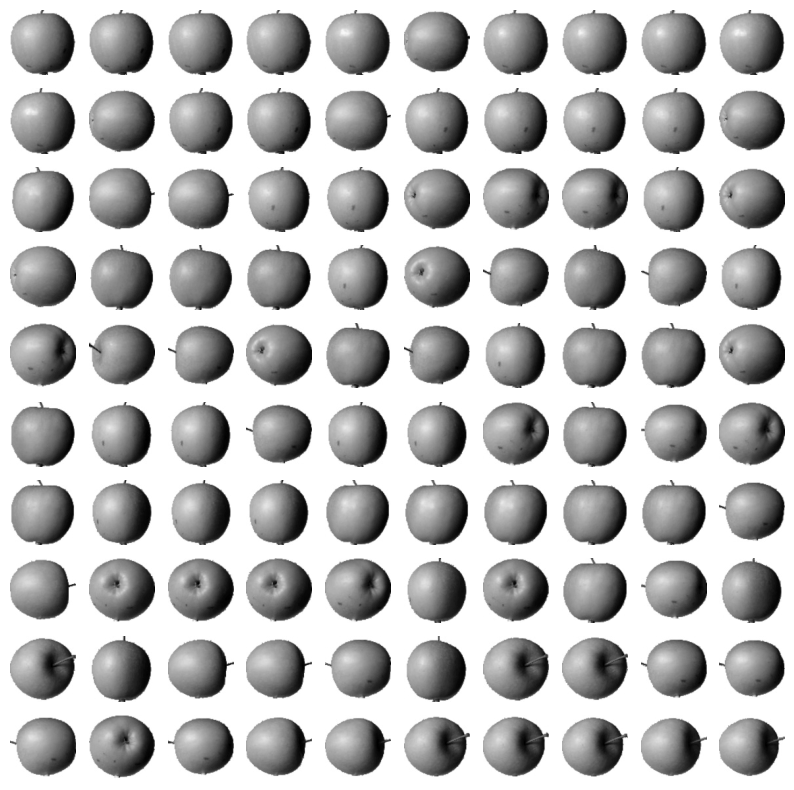

In [61]:
apple_index = np.argsort(abs_mean)[:100] #배열의 원소들을 오름차순으로 정렬한 인덱스 반환, 상위 100개의 작은 차이를 가진 이미지에 대한 인덱스 선택
fig, axs = plt.subplots(10, 10, figsize=(10,10)) #10x10 크기의 그림 그리드를 생성
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r') #선택된 이미지를 해당 그리드 셀에 표시
        axs[i, j].axis('off')
plt.show()

In [62]:
fruits_2d = fruits.reshape(-1, 100*100) #fruits 배열을 2차원 배열로 재구성

In [63]:
#KMeans 알고리즘을 사용하여 fruits_2d 데이터 클러스터링
km = KMeans(n_clusters=3, random_state=42)

km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [64]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [65]:
print(km.transform(fruits_2d[100:101])) # KMeans 모델을 사용해 fruits_2d의 100번째 이미지를 클러스터링하고, 각 클러스터 중심까지의 거리를 출력

[[3393.8136117  8837.37750892 5267.70439881]]


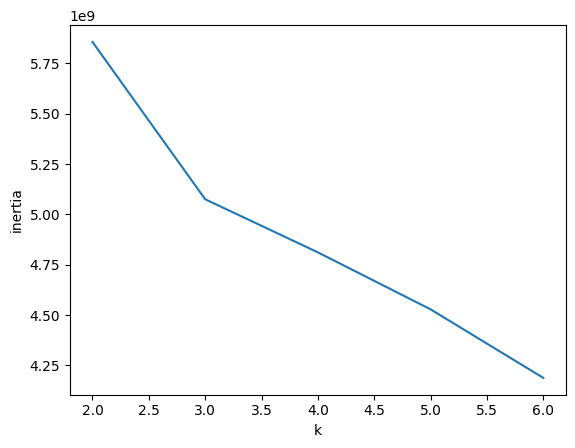

In [66]:
# elbow
inertia = [] #클러스터 내 제곱 거리의 합을 저장할 리스트

# k를 2부터 6까지 변경하면서 KMeans 모델을 훈련하고 클러스터 내 제곱 거리의 합을 inertia 리스트에 저장
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [67]:
pca = PCA(n_components=50) #PCA 모델을 사용해 fruits_2d 데이터를 50개의 주성분으로 차원 축소
pca.fit(fruits_2d) #PCA 모델을 훈련해 fruits_2d 데이터를 주성분으로 변환

PCA(n_components=50)

In [71]:
print(pca.components_.shape) #PCA 모델이 학습한 주성분의 형태 출력

(50, 10000)


In [72]:
print(fruits_2d.shape)

(300, 10000)


In [74]:
fruits_pca = pca.transform(fruits_2d) #PCA 모델을 사용하여 fruits_2d 데이터를 주성분으로 변환

In [75]:
print(fruits_pca.shape)

(300, 50)


In [76]:
fruits_inverse = pca.inverse_transform(fruits_pca) #PCA 변환된 데이터를 원래의 고차원 공간으로 복원

print(fruits_inverse.shape)

(300, 10000)


In [77]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100) #다시 복원된 데이터를 원래의 이미지 형태로 변환

In [78]:
print(np.sum(pca.explained_variance_ratio_)) #주성분이 설명하는 분산의 총 합 출력

0.9215573896400268


In [79]:
lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100) #타깃 클래스 생성

In [80]:
scores = cross_validate(lr, fruits_2d, target) #Logistic Regression 모델에 대한 교차 검증

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.984768009185791


In [81]:
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.015848398208618164


In [82]:
km = KMeans(n_clusters=3, random_state=42) # KMeans 클러스터링 모델 초기화

km.fit(fruits_pca) #클러스터링

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

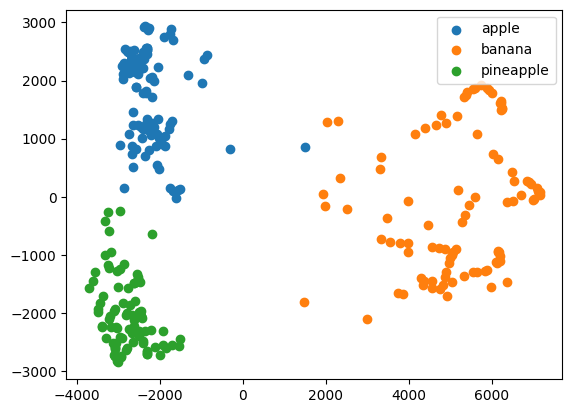

In [83]:
#KMeans 클러스터링 결과 시각화
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()